# Introduction

## 1. Setting Objectives

- Analysis Scope:
  - ASEAN dataset excluding high-income countries Singapore and Brunei Darussalam
- Analysis Objectives:
  - To analyze the impact of urbanization and related variables on carbon dioxide emissions in ASEAN countries
- Analysis Tools
  - Python
- Expected Effects:
  - Factors affecting carbon dioxide emissions in ASEAN countries, excluding high-income countries Singapore and Brunei Darussalam, can be found and considered when establishing national policies.

## 2. Data Selection and Analysis

## 1) Data Collection

- This data come from World Bank, Penn World Table, IEA.
- The data range is from 2000 to 2019
  - CO2 : CO2 emissions (metric tons per capita)
  - GDP : Real GDP at constant 2017 national prices (in mil. 2017US dollar)
  - Capital : Capital stock at constant 2017 national prices
  - Labor : Labor force, total
  - Electric: Power consumption (MWH)
  - POP: Population
  - Urbanization: Urban population (% of total population)
  - Forest Area: Forest area (% of land area)
  - IM: Imports of goods and services (% of GDP) 
  - EX: Exports of goods and services (% of GDP)
  - ODA: Net ODA received per capita (current US dollar)
  - FDI: Foreign direct investment, net inflows (% of GDP)
  - Human Capital: Human capital index, based on years of schooling and returns to education;

## 2) Conducting Exploratory Data Analysis (EDA) and Data Cleaning

In [1]:
# Importing necessary libraries for data analysis: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# Loading data
edata = pd.read_excel('Urbanization.xlsx')

# To display data
edata

,Country,Year,CO2,GDP,Capital,Labor,Electric,POP,Urbanization,Urbanization^2,Forest Area,IM,EX,ODA,FDI,Human capital,Efficiency
0,Indonesia,2000,255.0,1.170903e+06,6459948.000,100650985,82.6,214072421,42.002,1764.168004,53.943529,30.459567,40.977308,7.686324,-2.757440,2.185667,0.963096
1,Indonesia,2001,274.3,1.213565e+06,6689026.500,101677750,88.2,217112437,42.783,1830.385089,53.857202,30.761068,39.032139,6.716244,-1.855686,2.207746,0.941436
2,Indonesia,2002,279.9,1.268169e+06,6940189.000,101821406,90.8,220115092,43.568,1898.170624,53.770875,26.391841,32.687621,5.887874,0.074152,2.230048,0.957234
3,Indonesia,2003,308.6,1.328792e+06,7193683.000,103208206,94.5,223080121,44.356,1967.454736,53.684549,23.138839,30.477655,7.793747,-0.254256,2.252575,0.908192
4,Indonesia,2004,315.8,1.395642e+06,7532149.500,105014965,105.9,225938595,45.149,2038.432201,53.598222,27.544600,32.216695,0.431799,0.738244,2.275331,0.904622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vietnam,2015,165.2,5.705130e+05,1448291.000,54503885,151.6,92191398,33.809,1143.048481,44.871164,71.991373,72.922848,34.355049,4.931907,2.669350,0.947558
156,Vietnam,2016,183.4,6.059466e+05,1563604.625,54678039,168.6,93126529,34.510,1190.940100,45.878355,71.302222,74.107286,31.203567,4.900893,2.716025,0.971240
157,Vietnam,2017,185.3,6.472250e+05,1693455.375,54999073,182.6,94033048,35.213,1239.955369,45.996337,79.217556,81.762516,25.528898,5.011487,2.764934,0.980291
158,Vietnam,2018,235.1,6.930213e+05,1835394.000,55246119,203.6,94914330,35.919,1290.174561,46.234682,80.240482,84.423458,17.293068,4.998283,2.816210,0.945429


In [3]:
#Check data info
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         160 non-null    object 
 1   Year            160 non-null    int64  
 2   CO2             160 non-null    float64
 3   GDP             160 non-null    float64
 4   Capital         160 non-null    float64
 5   Labor           160 non-null    int64  
 6   Electric        160 non-null    float64
 7   POP             160 non-null    int64  
 8   Urbanization    160 non-null    float64
 9   Urbanization^2  160 non-null    float64
 10  Forest Area     160 non-null    float64
 11  IM              160 non-null    float64
 12  EX              160 non-null    float64
 13  ODA             160 non-null    float64
 14  FDI             160 non-null    float64
 15  Human capital   160 non-null    float64
 16  Efficiency      160 non-null    float64
dtypes: float64(13), int64(3), object(1)

In [4]:
#Remove spaces from data names
edata = edata.rename(columns={"Forest Area": "Forest_Area", "Human capital":"Human_capital", "Urbanization^2": "Urbanization2"})
edata.head()

,Country,Year,CO2,GDP,Capital,Labor,Electric,POP,Urbanization,Urbanization2,Forest_Area,IM,EX,ODA,FDI,Human_capital,Efficiency
0,Indonesia,2000,255.0,1170903.125,6459948.0,100650985,82.6,214072421,42.002,1764.168004,53.943529,30.459567,40.977308,7.686324,-2.757440,2.185667,0.963096
1,Indonesia,2001,274.3,1213564.625,6689026.5,101677750,88.2,217112437,42.783,1830.385089,53.857202,30.761068,39.032139,6.716244,-1.855686,2.207746,0.941436
2,Indonesia,2002,279.9,1268168.625,6940189.0,101821406,90.8,220115092,43.568,1898.170624,53.770875,26.391841,32.687621,5.887874,0.074152,2.230048,0.957234
3,Indonesia,2003,308.6,1328791.750,7193683.0,103208206,94.5,223080121,44.356,1967.454736,53.684549,23.138839,30.477655,7.793747,-0.254256,2.252575,0.908192
4,Indonesia,2004,315.8,1395641.625,7532149.5,105014965,105.9,225938595,45.149,2038.432201,53.598222,27.544600,32.216695,0.431799,0.738244,2.275331,0.904622


In [5]:
#Check dataset before delete duplicate rows
edata.shape

(160, 17)

In [6]:
#Check null value
print(edata.isnull().sum())

Country          0
Year             0
CO2              0
GDP              0
Capital          0
Labor            0
Electric         0
POP              0
Urbanization     0
Urbanization2    0
Forest_Area      0
IM               0
EX               0
ODA              0
FDI              0
Human_capital    0
Efficiency       0
dtype: int64


In [7]:
edata.dtypes

Country           object
Year               int64
CO2              float64
GDP              float64
Capital          float64
Labor              int64
Electric         float64
POP                int64
Urbanization     float64
Urbanization2    float64
Forest_Area      float64
IM               float64
EX               float64
ODA              float64
FDI              float64
Human_capital    float64
Efficiency       float64
dtype: object

In [8]:
#Calculate descriptive statistics
edata.describe()

,Year,CO2,GDP,Capital,Labor,Electric,POP,Urbanization,Urbanization2,Forest_Area,IM,EX,ODA,FDI,Human_capital,Efficiency
count,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2009.500000,127.181875,5.837354e+05,2.680000e+06,3.599055e+07,73.674375,7.365991e+07,39.558481,1794.549033,49.296782,49.290324,48.991637,19.411431,3.847998,2.239084,0.865782
std,5.784386,131.982740,6.502515e+05,3.683697e+06,3.431185e+07,69.997139,7.116353e+07,15.202634,1399.117735,14.215014,22.483527,25.743467,22.908176,3.085147,0.438181,0.146748
min,2000.000000,0.900000,1.508830e+04,2.798319e+04,2.504990e+06,0.400000,5.430853e+06,18.586000,345.439396,22.938995,5.767248,6.088151,-14.489567,-2.757440,1.515689,0.271040
25%,2004.750000,9.775000,6.547625e+04,1.460731e+05,9.472230e+06,4.625000,2.126080e+07,28.085500,788.801797,39.279688,30.737568,28.910930,2.059688,2.023757,1.802183,0.856019
50%,2009.500000,84.550000,4.147989e+05,1.349016e+06,2.711477e+07,62.950000,5.805341e+07,35.108500,1232.617692,50.078640,54.271293,46.282491,7.224035,3.241160,2.318836,0.916780
75%,2014.250000,208.900000,7.724161e+05,3.757525e+06,4.234492e+07,126.300000,8.936634e+07,46.916000,2201.111299,58.673041,65.704363,66.698478,35.775676,4.663793,2.607713,0.954430
max,2019.000000,571.100000,3.110470e+06,1.778576e+07,1.361421e+08,271.000000,2.695829e+08,76.607000,5868.632449,75.498267,100.597080,119.809709,86.101693,14.145725,3.078611,0.985567


## 3) Data Analysis

In [9]:
# Check unique values in the 'Country' column
unique_countries = edata['Country'].unique()
print(unique_countries)

['Indonesia' 'Cambodia' 'Laos' 'Myanmar' 'Malaysia' 'Philippines'
 'Thailand' 'Vietnam']


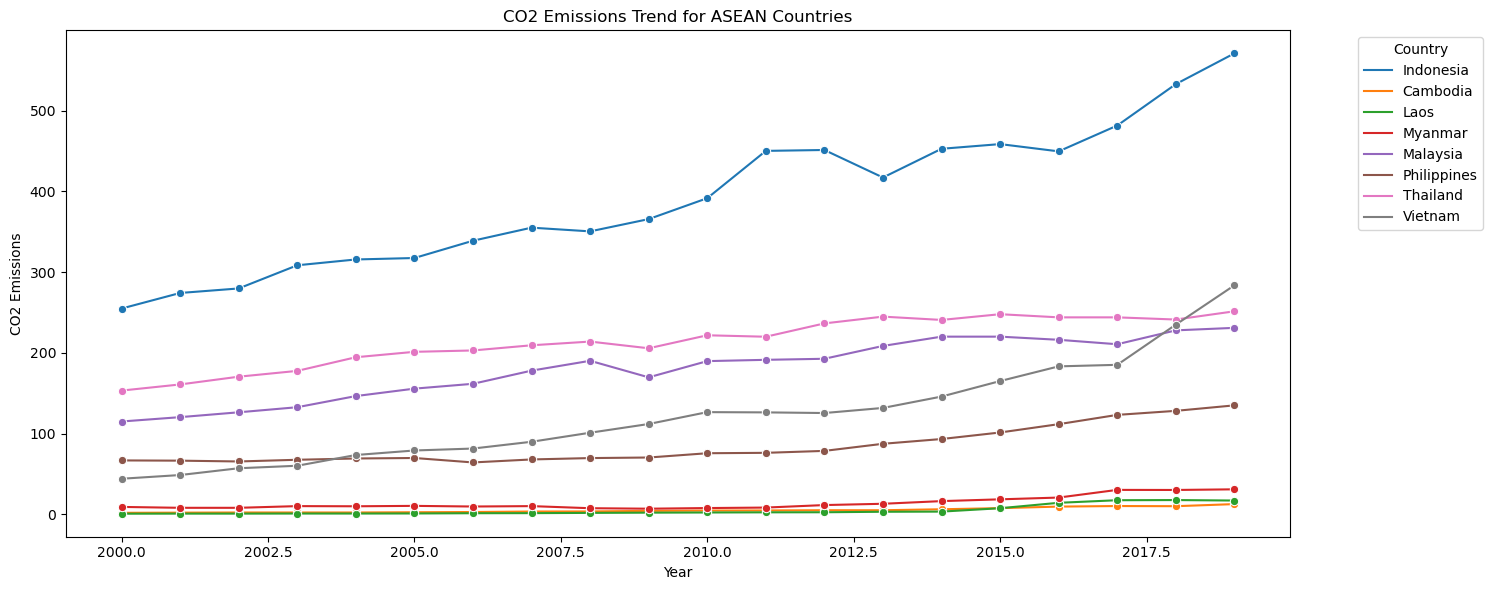

In [10]:
# List of countries
ASEAN = ['Indonesia', 'Cambodia', 'Laos', 'Myanmar', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam']

# Filter data for the ASEAN countries
ASEAN_data = edata[edata['Country'].isin(ASEAN)]

# Convert the 'Year' column to integers
ASEAN_data['Year'] = ASEAN_data['Year'].astype(int)

# Plot CO2 emissions trend for ASEAN countries
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='CO2', hue='Country', data=ASEAN_data, marker='o')

plt.title('CO2 Emissions Trend for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

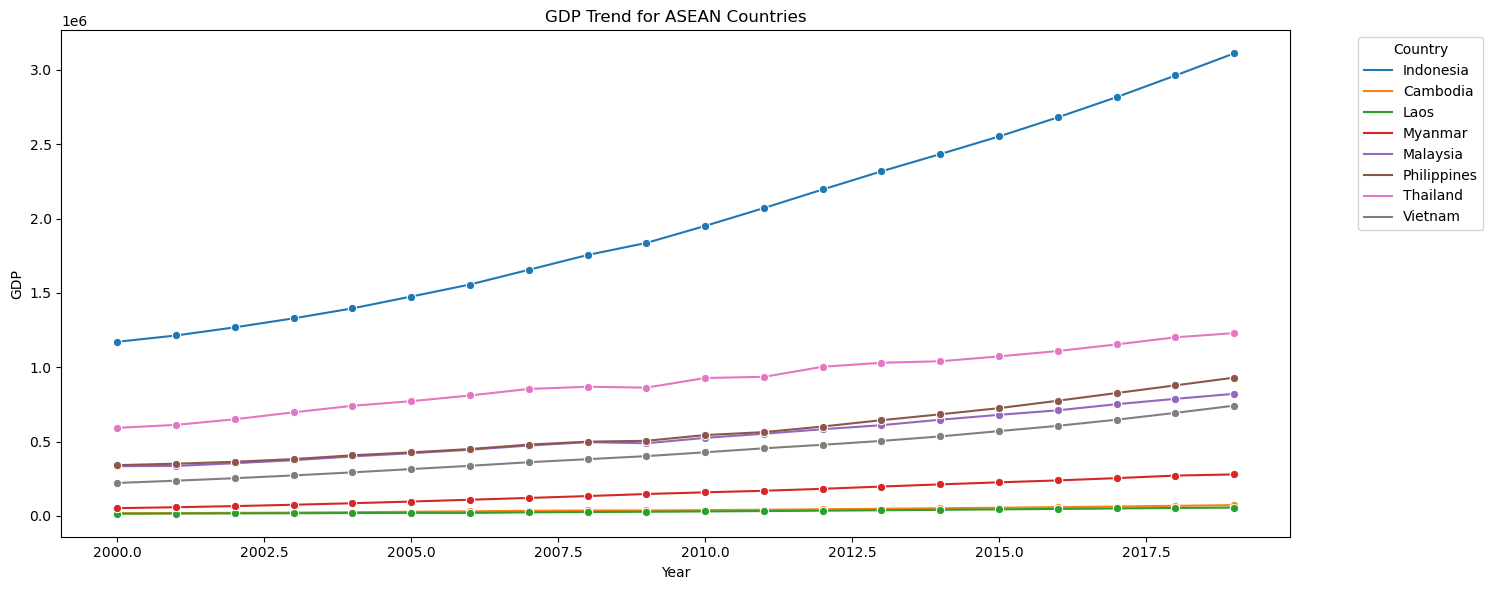

In [11]:
# Plot GDP trend for ASEAN countries
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=ASEAN_data, marker='o')

plt.title('GDP Trend for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

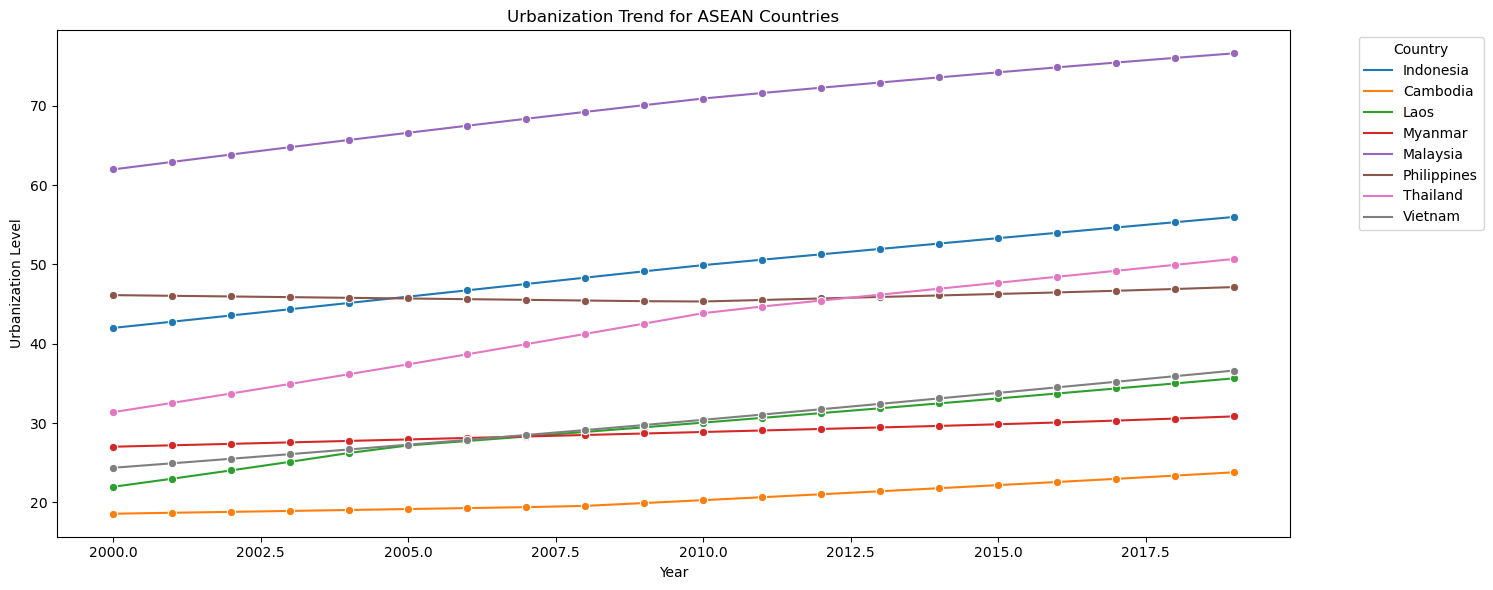

In [12]:
# Plot urbanization trend for ASEAN countries
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Urbanization', hue='Country', data=ASEAN_data, marker='o')

plt.title('Urbanization Trend for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('Urbanization Level')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

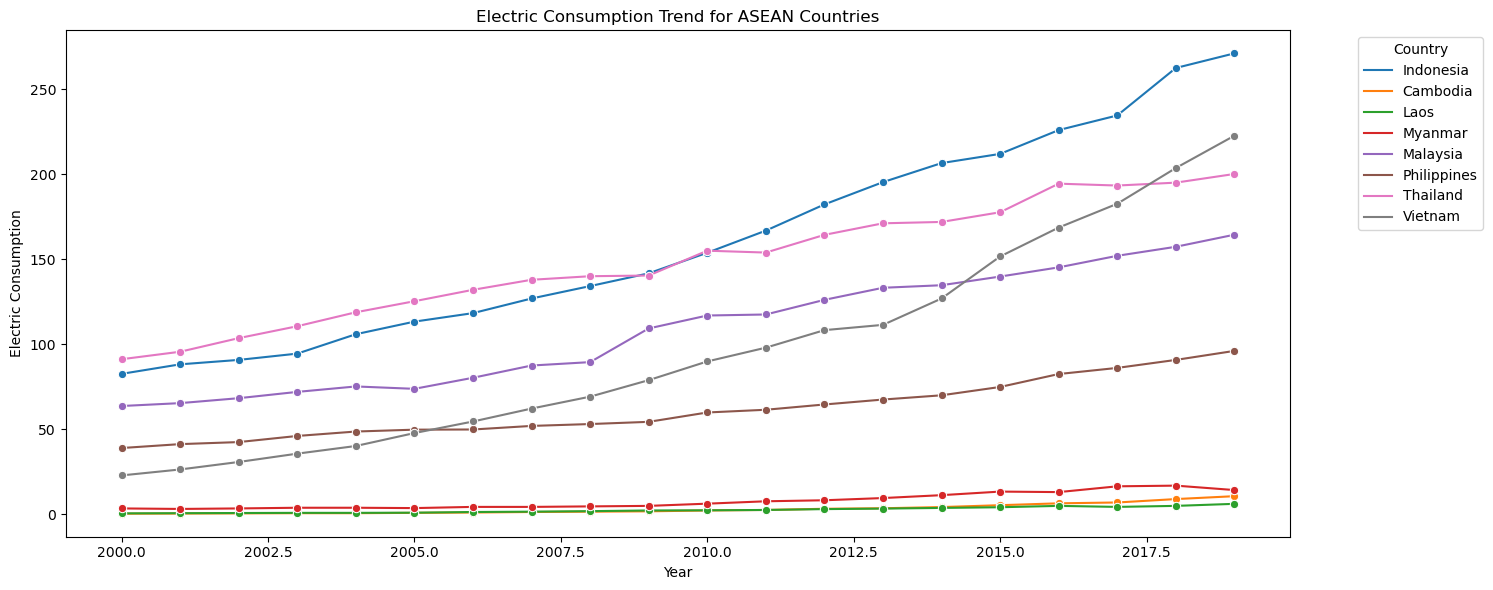

In [13]:
# Plot electric consumption trend for ASEAN countries
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Electric', hue='Country', data=ASEAN_data, marker='o')

plt.title('Electric Consumption Trend for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('Electric Consumption')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

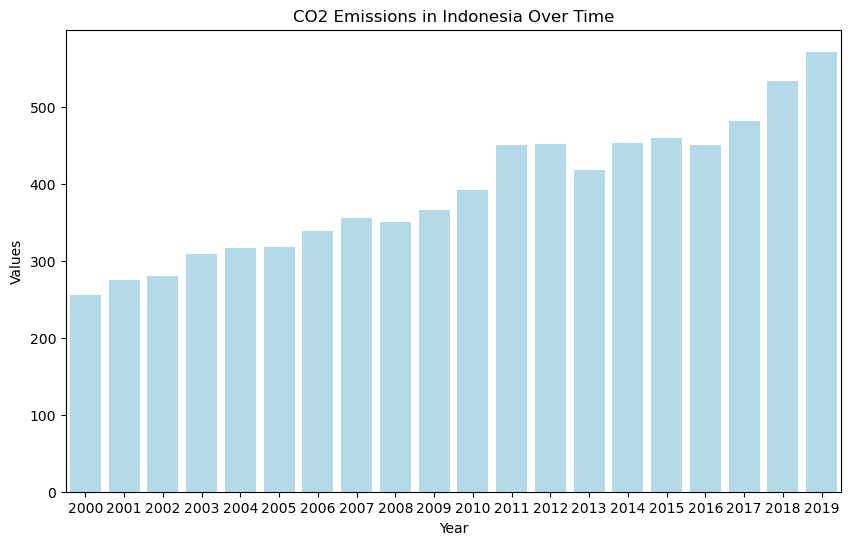

In [14]:
# Filter data for Indonesia
indonesia_data = edata[edata['Country'] == 'Indonesia']

# Create figure and axes objects
plt.figure(figsize=(10, 6))

# Plot CO2 emissions using bar plot
sns.barplot(x='Year', y='CO2', data=indonesia_data, color='skyblue', alpha=0.7, label='CO2 Emissions')

plt.title('CO2 Emissions in Indonesia Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

,Year,CO2,GDP,Capital,Labor,Electric,POP,Urbanization,Urbanization2,Forest_Area,IM,EX,ODA,FDI,Human_capital,Efficiency
Year,1.000000,0.228669,0.262438,0.194460,0.099407,0.371683,0.073277,0.209099,0.192481,-0.064123,-0.022133,-0.053591,0.167528,0.294321,0.291852,-0.101979
CO2,0.228669,1.000000,0.958732,0.945558,0.844502,0.918638,0.817085,0.618626,0.546998,-0.151067,-0.077783,0.095938,-0.575154,-0.394113,0.592216,0.298862
GDP,0.262438,0.958732,1.000000,0.985262,0.904425,0.844778,0.892105,0.507634,0.420358,-0.216606,-0.263886,-0.121662,-0.535694,-0.404463,0.457578,0.281972
Capital,0.194460,0.945558,0.985262,1.000000,0.874404,0.799657,0.859359,0.472121,0.393647,-0.116542,-0.262481,-0.120974,-0.496832,-0.376153,0.368915,0.281765
Labor,0.099407,0.844502,0.904425,0.874404,1.000000,0.678145,0.991227,0.256783,0.152397,-0.292648,-0.378640,-0.266819,-0.448110,-0.389654,0.289184,0.156456
Electric,0.371683,0.918638,0.844778,0.799657,0.678145,1.000000,0.628213,0.637183,0.568863,-0.276012,0.093841,0.257431,-0.587466,-0.354319,0.749417,0.340849
POP,0.073277,0.817085,0.892105,0.859359,0.991227,0.628213,1.000000,0.283677,0.177501,-0.315138,-0.430258,-0.315220,-0.465055,-0.424880,0.284188,0.168346
Urbanization,0.209099,0.618626,0.507634,0.472121,0.256783,0.637183,0.283677,1.000000,0.983338,-0.112411,0.149373,0.366099,-0.595663,-0.419864,0.833919,0.336985
Urbanization2,0.192481,0.546998,0.420358,0.393647,0.152397,0.568863,0.177501,0.983338,1.000000,-0.017941,0.215138,0.422533,-0.545601,-0.343237,0.786448,0.321958
Forest_Area,-0.064123,-0.151067,-0.216606,-0.116542,-0.292648,-0.276012,-0.315138,-0.112411,-0.017941,1.000000,0.121734,0.045827,0.535638,0.228619,-0.425533,-0.068405


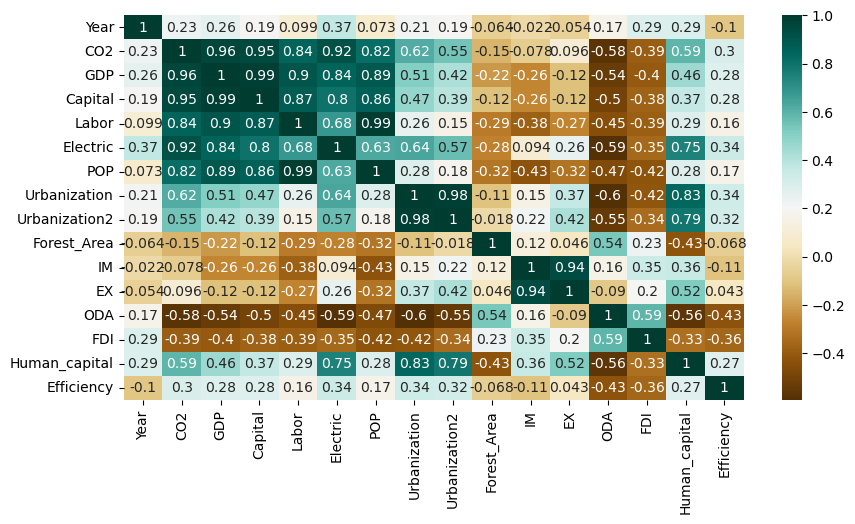

In [15]:
# Create a graph of size (10,5)
plt.figure(figsize = (10, 5))

#Correlation analysis of data sets consisting of only numerical data (heatmap)
corr = edata.corr()
sns.heatmap(corr, cmap="BrBG", annot=True)
corr

- Independent variables that have a strong correlation with the dependent variable carbon dioxide emissions (CO2) are GDP (0.96), Capital Stock (0.92), Electricity (0.92), Labor Force (0.84), Population (0.82), and Urbanization (0.62) ) appears in that order.
- Regression analysis was performed because correlation analysis was insufficient to explain the relationship between dependent and independent variables.

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Add constant
edata = sm.add_constant(edata)
# Fit the OLS regression model
model = smf.ols('CO2 ~ GDP + Capital + Labor + Electric + Urbanization + Human_capital', data=edata).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2034.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          3.71e-143
Time:                        22:36:15   Log-Likelihood:                -656.43
No. Observations:                 160   AIC:                             1327.
Df Residuals:                     153   BIC:                             1348.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -35.3308     13.271     -2.662

In [17]:
# Add constant
edata = sm.add_constant(edata)

# Fit the OLS regression model
model = smf.ols('CO2 ~ Urbanization + Urbanization2 + Forest_Area + IM + EX + ODA + FDI + Human_capital', data=edata).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     36.57
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.06e-31
Time:                        22:36:15   Log-Likelihood:                -921.55
No. Observations:                 160   AIC:                             1861.
Df Residuals:                     151   BIC:                             1889.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -910.1176    102.992     -8.837

# Conclusion

### 1) Overall

- Trend Analysis
  - Analyzing trends in ASEAN countries (Indonesia, Cambodia, Laos, Myanmar, Malaysia, Philippines, Thailand, Vietnam)
  - Indonesia had the highest CO2 emissions, GDP, and electricity consumption, but the level of urbanization was second.
  - The level of urbanization was high in Malaysia, but other variables were not high


- Correlation and Regression Analysis Result
  - Independent variables that have a strong correlation with the dependent variable carbon dioxide emissions (CO2) are GDP (0.96), Capital Stock (0.92), Electricity (0.92), Labor Force (0.84), Population (0.82), and Urbanization (0.62) ) appears in that order.
  - Regression analysis was performed because correlation analysis was insufficient to explain the relationship between dependent and independent variables.
    - When analyzing variables with a strong correlation with CO2 (GDP, Capital, Labor, Electricity, Urbanization, Human Capital), they were significant except for Human Capital.
    - The value of R-squred is also 0.98, so it is considered that the independent variable has a strong ability to explain the dependent variable.
    - However, it was found that usually countries increase CO2 as their GDP increases, but ASEAN countries decrease it because they are low-income countries.
    - This analysis shows that carbon dioxide emissions increase as urbanization and electricity use increase.


- Additional Regression Analysis Result
  - Additionally, regression analysis of relationships with other variables
    - Significant except for import and export variables
    - The coefficient of determination was low at 0.66.
    - It appears that carbon dioxide decreases as urbanization progresses (Urbanization2).
    - As ODA inflow increases, carbon dioxide decreases, but as FDI inflow, human capital development, and forest area increase, carbon dioxide increases.

### 2) Conclusion

- It is an unavoidable fact that as urbanization progresses, population and electricity use increase, resulting in increased carbon dioxide emissions.
- Most ASEAN countries are developing countries and receive ODA, so the international community should work together to promote green ODA projects and the use of renewable energy to reduce their carbon dioxide emissions.